# TF-IDF vectorizer

In [1]:
%matplotlib inline

In [2]:
pwd

u'/Users/zangsir/Desktop/text-mining-compmusic/ipynb-ismir16'

In [3]:
# -*- coding: utf-8 -*-


import sys, os
import numpy as np
reload(sys)
sys.setdefaultencoding("utf-8")

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sys, os
import numpy as np
reload(sys)
sys.setdefaultencoding("utf-8")

import codecs,re
from sklearn.feature_extraction.text import CountVectorizer


stop_ori='的 一 不 在 人 有 是 为 以 于 上 他 而 后 之 来 及 了 因 下 可 到 由 这 与 也 此 但 并 个 其 已 无 小 我 们 起 最 再 今 去 好 只 又 或 很 亦 某 把 那 你 乃 它 吧 被 比 别 趁 当 从 到 得 打 凡 儿 尔 该 各 给 跟 和 何 还 即 几 既 看 据 距 靠 啦 了 另 么 每 们 嘛 拿 哪 那 您 凭 且 却 让 仍 啥 如 若 使 谁 虽 随 同 所 她 哇 嗡 往 哪 些 向 沿 哟 用 于 咱 则 怎 曾 至 致 着 诸 自'
#stop_ori='我 一 不 你 把 了 是 来 在 他 的 有 将 见 人 与 得 要 到 听 那 又 为 上 这 三 只 好 二 说 无 家 也'
frwords=codecs.decode(stop_ori,'utf-8')
stoplist=set(frwords.split())
stoplist_ori=set(stop_ori.split())#not useful now

#corpus_path = 'sqbs7_all_docs'
corpus_path = 'naming_sqbs_pl'
filenames=[os.path.join(corpus_path, fn) for fn in sorted(os.listdir(corpus_path))]
if 'naming_sqbs_pl/.DS_Store' in filenames:
    filenames.remove('sqbs7_all_docs/.DS_Store')



pat=re.compile(r'(?u)\b\w+\b',re.UNICODE )
vectorizer = TfidfVectorizer(input='filename',stop_words=stoplist,token_pattern=pat) 
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab_list = vectorizer.get_feature_names()
#dtm = dtm.toarray()  # convert to a regular array 


In [38]:
len(vocab_list)

25081

In [39]:
count=0
for i in vocab_list:
    if len(i)==1:
        count+=1
print count

In [5]:
dtma = dtm.toarray() 
from __future__ import division
a=np.count_nonzero(dtma)
b=len(dtma)*len(vocab_list)
c=a/b

In [6]:
#you can also use cosine similarity here. we'll plot both using tf-idf and using count.

# clustering

In [7]:
len(filenames)

1429

In [8]:
#notice that if you plot, it will be based on distance and MDS. clustering doesn't generate 
# a plot. 

In [9]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(dtm)

clusters = km.labels_.tolist()

In [10]:
len(clusters) #it's a list.

1429

In [11]:
#print to kernal 
for i in range(len(filenames)):
    print i,filenames[i],"\n"

In [12]:
ehyuanb=['ehyuanb']*163
ehmb=['ehmb']*(247-163+1)
ehyaob=['ehyaob']*(407-248+1)
xpyuanb=['xpyuanb']*(690-408+1)
xpkb=['xpkb']*(923-691+1)
xpmb=['xpmb']*(1048-924+1)
xpyaob=['xpyaob']*(1428-1049+1)

In [13]:
zip([1,2],[3,4])

[(1, 3), (2, 4)]

In [29]:
import os

root_path = '/Users/zangsir/Downloads/classify-text-master/dataset/'
folders = ['ehyuanb','ehmb','ehyaob','xpyuanb','xpkb','xpmb','xpyaob']
for folder in folders:
    os.mkdir(os.path.join(root_path,folder))

In [30]:
print ' \xe9\xaa\x82 \xe4\xb8\x81\xe5\xa5\x89 \xe5\x92\x8c \xe5\xbe\x90\xe7\x9b\x9b \xe5\xa5\xbd \xe6\xb2\xa1 \xe6\x9d\xa5\xe7\x94\xb1   \xe5\x86\x8d \xe5\xa4\x9a \xe8\xa8\x80 \xe5\x8f\xab \xe5\x9b\x9b \xe5\xbc\x9f \xe6\x89\xbe\xe5\xb0\x94\xe5\xa4\xb4\xe9\xa6\x96   \xe7\xae\xa1 \xe5\x8f\xab \xe4\xbd\xa0 \xe4\xb8\x80\xe4\xb8\xaa\xe4\xb8\xaa \xe5\x91\xbd\xe4\xb8\xa7 \xe4\xb9\x9d\xe6\xb3\x89\n \xe8\xb5\xb5\xe5\xad\x90\xe9\xbe\x99 \xe5\x9c\xa8 \xe4\xb8\x80\xe6\x97\x81 \xe5\xa8\x81\xe9\xa3\x8e \xe6\x8a\x96\xe6\x93\x9e   \xe5\x86\x8d \xe5\xa4\x9a \xe8\xa8\x80 \xe7\xae\xa1 \xe5\x8f\x96\xe5\xb0\x94\xe9\xa1\xb9 \xe4\xb8\x8a \xe4\xba\xba\xe5\xa4\xb4\n \xe5\xb8\x90 \xe4\xb8\xad \xe5\xa5\x89 \xe4\xba\x86 \xe9\x83\xbd\xe7\x9d\xa3\xe4\xbb\xa4   \xe8\xbf\xbd\xe8\xb5\xb6 \xe5\x88\x98\xe5\xa4\x87 \xe8\xa6\x81 \xe5\xb0\x8f\xe5\xbf\x83\n'

In [14]:
classes=ehyuanb+ehmb+ehyaob+xpyuanb+xpkb+xpmb+xpyaob

In [15]:
len(classes)

1429

In [16]:
#put the count into a dict

from collections import defaultdict


clust=defaultdict(dict)

for pair in zip(clusters,classes):
    key_clust=pair[0]
    key_class=pair[1]
    if clust[key_clust]:
        if not key_class in clust[key_clust]:
            clust[key_clust][key_class]=1
        else:
            clust[key_clust][key_class]+=1
    else:
        clust[key_clust]={key_class:1}

In [17]:
clust

defaultdict(dict,
            {0: {'ehmb': 4,
              'ehyaob': 5,
              'ehyuanb': 2,
              'xpkb': 9,
              'xpmb': 11,
              'xpyaob': 5,
              'xpyuanb': 11},
             1: {'ehmb': 12,
              'ehyaob': 16,
              'ehyuanb': 13,
              'xpkb': 23,
              'xpmb': 7,
              'xpyaob': 34,
              'xpyuanb': 23},
             2: {'ehmb': 2,
              'ehyaob': 43,
              'ehyuanb': 31,
              'xpkb': 32,
              'xpmb': 7,
              'xpyaob': 104,
              'xpyuanb': 32},
             3: {'ehmb': 54,
              'ehyaob': 61,
              'ehyuanb': 90,
              'xpkb': 103,
              'xpmb': 74,
              'xpyaob': 150,
              'xpyuanb': 157},
             4: {'ehmb': 5,
              'ehyaob': 16,
              'ehyuanb': 13,
              'xpkb': 11,
              'xpmb': 9,
              'xpyaob': 13,
              'xpyuanb': 10},
        

In [25]:
import pandas as pd

df = pd.DataFrame.from_dict(clust,orient='index')
#you need to set the names for the columns
df

,xpyuanb,ehyaob,xpmb,ehyuanb,ehmb,xpkb,xpyaob
0,11,5,11,2,4,9,5
1,23,16,7,13,12,23,34
2,32,43,7,31,2,32,104
3,157,61,74,90,54,103,150
4,10,16,9,13,5,11,13
5,32,8,11,4,2,38,49
6,18,11,6,10,6,17,25


In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

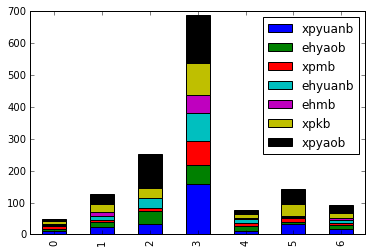

In [26]:
df.plot.bar(stacked=True);

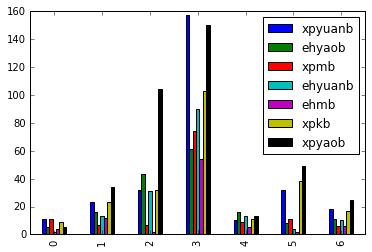

In [27]:
df.plot.bar();